In [46]:
### funciones

import numpy as np
import cv2
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def dicc_to_matrix(dicc_data):
  max_i = max(dicc_data, key=lambda x: x[0])[0]
  max_j = max(dicc_data, key=lambda x: x[1])[1]
  matrix = np.zeros((max_i + 1, max_j + 1), dtype=int)
  for key, value in dicc_data.items():
      matrix[key[0], key[1]] = value
  return matrix
def glcm(image):
  min,max = image.min(),image.max()
  nds = list(range(min, max + 1))

  ### Este - Oeste
  comb_dicc = {}
  for x in nds:
    for y in nds:
      comb_dicc[x,y]=0
  rows = image.shape[0]
  for r in range(rows):
    renglon = image[r]
    for i in range(len(renglon)-1):
      par = (renglon[i],renglon[i+1])
      if par in list(comb_dicc.keys()):
        comb_dicc[par]+=1
  m_e = dicc_to_matrix(comb_dicc)
  m_o = m_e.T
  m_h = m_e+m_o
  m_h_n = m_h*(1/np.sum(m_h))

  ### Norte - Sur
  comb_dicc = {}
  for x in nds:
    for y in nds:
      comb_dicc[x,y]=0
  columns = image.shape[1]
  for c in range(columns):
    for r in range(rows-1):
      par = (image[r][c],image[r+1][c])
      if par in list(comb_dicc.keys()):
        comb_dicc[par]+=1
  m_s = dicc_to_matrix(comb_dicc)
  m_n = m_s.T
  m_v = m_s+m_n
  m_v_n = m_v*(1/np.sum(m_v))

  #return m_e,m_o,m_h,m_h_n,m_s,m_n,m_v,m_v_n
  return m_h_n,m_v_n

In [79]:
img = Image.open('brodatz/D26.bmp').convert('L')
img_array = np.array(img)
rows, colums = img_array.shape
img_array[0:3,0:3]

array([[222, 222, 227],
       [234, 222, 234],
       [227, 221, 221]], dtype=uint8)

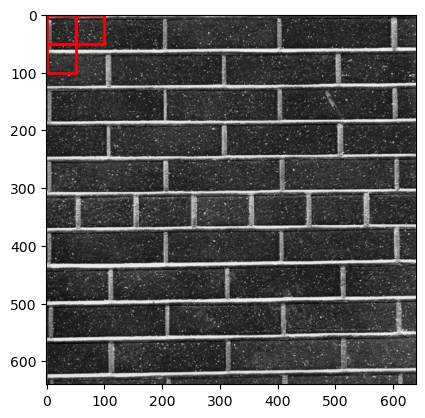

In [98]:
from matplotlib.patches import Rectangle
fig=plt.figure()

plt.imshow(img_array, cmap='gray')
plt.gca().add_patch(Rectangle((0,0),50,50,
                    edgecolor='red',
                    facecolor='none',
                  lw=2))

plt.gca().add_patch(Rectangle((50,0),50,50,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
plt.gca().add_patch(Rectangle((0,50),50,50,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
